In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df_read = pd.read_csv("covid_flu.csv")
df = df_read.copy()
df.head()


,Diagnosis,InitialPCRDiagnosis,Age,Sex,neutrophil,serumLevelsOfWhiteBloodCell,lymphocytes,CReactiveProteinLevels,DurationOfIllness,CTscanResults,RiskFactors,GroundGlassOpacity,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Temperature,Fatigue
0,H1N1,NaN,67.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,NaN,No,NaN,38.111111,No
1,H1N1,NaN,29.0,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,H1N1,NaN,22.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,H1N1,NaN,20.0,F,NaN,NaN,NaN,NaN,NaN,NaN,immuno,NaN,NaN,Yes,Yes,NaN,No,NaN,36.555556,Yes
4,H1N1,NaN,21.0,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.dtypes

Diagnosis                       object
InitialPCRDiagnosis             object
Age                            float64
Sex                             object
neutrophil                     float64
serumLevelsOfWhiteBloodCell    float64
lymphocytes                    float64
CReactiveProteinLevels          object
DurationOfIllness              float64
CTscanResults                   object
RiskFactors                     object
GroundGlassOpacity              object
Diarrhea                        object
Fever                           object
Coughing                        object
ShortnessOfBreath               object
SoreThroat                      object
NauseaVomitting                 object
Temperature                    float64
Fatigue                         object
dtype: object

Determining the percentage of null values in each column

In [5]:
print(f"The percentage of null values in each column are as follows:")
df.isnull().mean() * 100

The percentage of null values in each column are as follows:


Diagnosis                       0.000000
InitialPCRDiagnosis            92.982456
Age                             1.889339
Sex                             5.128205
neutrophil                     93.049933
serumLevelsOfWhiteBloodCell    89.811066
lymphocytes                    89.473684
CReactiveProteinLevels         90.755735
DurationOfIllness              94.129555
CTscanResults                  89.271255
RiskFactors                    85.897436
GroundGlassOpacity             93.724696
Diarrhea                       69.635628
Fever                          37.719298
Coughing                       42.037787
ShortnessOfBreath              94.939271
SoreThroat                     54.790823
NauseaVomitting                71.592443
Temperature                    57.624831
Fatigue                        64.170040
dtype: float64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482 entries, 0 to 1481
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Diagnosis                    1482 non-null   object 
 1   InitialPCRDiagnosis          104 non-null    object 
 2   Age                          1454 non-null   float64
 3   Sex                          1406 non-null   object 
 4   neutrophil                   103 non-null    float64
 5   serumLevelsOfWhiteBloodCell  151 non-null    float64
 6   lymphocytes                  156 non-null    float64
 7   CReactiveProteinLevels       137 non-null    object 
 8   DurationOfIllness            87 non-null     float64
 9   CTscanResults                159 non-null    object 
 10  RiskFactors                  209 non-null    object 
 11  GroundGlassOpacity           93 non-null     object 
 12  Diarrhea                     450 non-null    object 
 13  Fever             

**Observation:** Columns such as **InitialPCRDiagnosis**, **neutrophil**, **CReativeProteinLevels**, **DUrationofIllness**, **GroundGlassOpacity**, **CTscanResults**, **serumLevelsOfWhiteBloodCell**, and **lymphocytes** have percentage of missing values in the range of 90%. 

The dependent variable in this dataset is Diagnosis with two class labels namely, H1N1 and Covid-19. Therefore, the following cell determines the percentage of these two class labels

In [7]:
df['Diagnosis'].value_counts(normalize = True)

Diagnosis
H1N1       0.723347
COVID19    0.276653
Name: proportion, dtype: float64

**Observation:** We see that nearly 72% of the diagnositic data belongs to H1N1 cases and the rest to COVID19 cases. The null accuracy of a classification model is 72% which means that if the model were to guess randomly over and over again it will correctly classify H1N1 cases, 72% of the time. This score is our baseline for all the models and our goal is to beat this score.  

In [8]:
numerical_columns = [col for col in df.columns if df[col].dtype in ['float16' , 'float32', 'float64', 'int16', 'int32', 'int64']]
print(numerical_columns)

['Age', 'neutrophil', 'serumLevelsOfWhiteBloodCell', 'lymphocytes', 'DurationOfIllness', 'Temperature']


## Treatment of missing quantitative data:
- Impute the missing data with mean or median or arbitrary value
- Drop the record from the dataframe containing the missing data.
---
Some Important notes: 
1) **Arbitrary imputation**: Fill the missing values with a constant that is outside the range of the existing data or that is unreasonable according to the domain knowledge. This will add meaning to the missing data. Through this method the missing data will be highlighted to the model and the model may assume it to be some random noise. 
2) **End-of-tail imputation**: This method is also like the arbitrary imputation except for the fact that constant values are the ends of the distribution. For a normal distribution, the values might be mean + 3*std or mean - 3*std. For a skewed distribution, the values can be q1 - 1.5*IQR or q3 + 1.5*IQR.   

The mean of the lymphocytes is: 1.8501538461538463
Lymphocytes Column after mean imputation:
[[1.85015385]
 [1.85015385]
 [1.85015385]
 [1.85015385]
 [1.85015385]] 

The median of the lymphocytes is: 0.9055
Lymphocytes Column after median imputation:
[[0.9055]
 [0.9055]
 [0.9055]
 [0.9055]
 [0.9055]] 



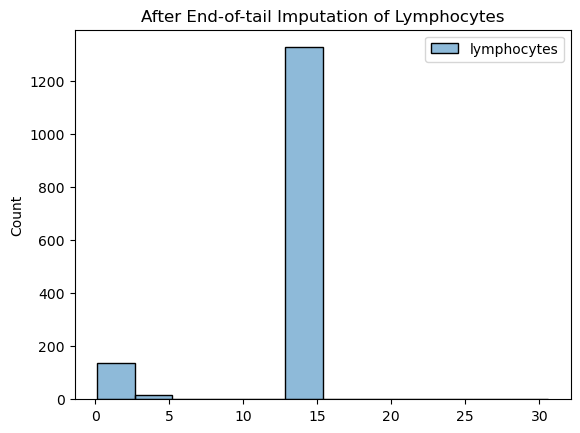

Text(0.5, 1.0, 'Original Lymphocytes data')

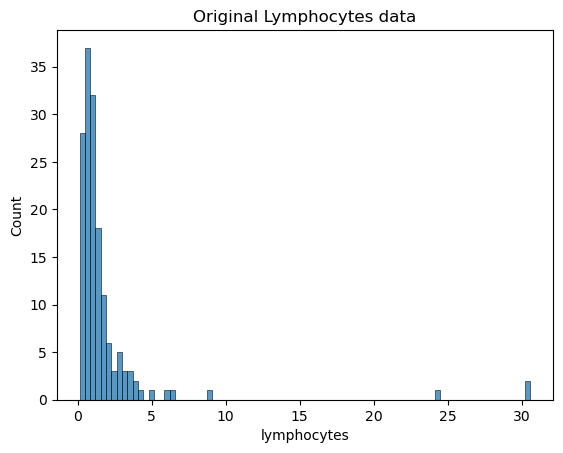

In [9]:
from sklearn.impute import SimpleImputer

# Mean imputation
mean_imputer = SimpleImputer(strategy='mean')
print(f"The mean of the lymphocytes is: {df['lymphocytes'].mean()}")
print("Lymphocytes Column after mean imputation:")
print(mean_imputer.fit_transform(df[['lymphocytes']])[:5], "\n")

# Median Imputation
median_imputer = SimpleImputer(strategy='median')
print(f"The median of the lymphocytes is: {df['lymphocytes'].median()}")
print("Lymphocytes Column after median imputation:")
print(median_imputer.fit_transform(df[['lymphocytes']])[:5], "\n")

# End-of-Tail Imputation
from feature_engine.imputation.end_tail import EndTailImputer
end_tail_imputation = EndTailImputer().fit_transform(df[['lymphocytes']])
sns.histplot(data = end_tail_imputation)
plt.title("After End-of-tail Imputation of Lymphocytes")
plt.show()
sns.histplot(data = df['lymphocytes'])
plt.title("Original Lymphocytes data")


## Treatment of missing qualitative data

In [10]:
# Constructing a categorical features list
categorical_type = ['O']
categorical_columns = df.select_dtypes(include = categorical_type).columns.tolist()
categorical_columns.remove("Diagnosis")
print(categorical_columns)

['InitialPCRDiagnosis', 'Sex', 'CReactiveProteinLevels', 'CTscanResults', 'RiskFactors', 'GroundGlassOpacity', 'Diarrhea', 'Fever', 'Coughing', 'ShortnessOfBreath', 'SoreThroat', 'NauseaVomitting', 'Fatigue']


In [11]:
# Getting the value counts of each category
for col in categorical_columns:
    print("======")
    print(col)
    print("======")
    print(df[col].value_counts(dropna = False))

InitialPCRDiagnosis
InitialPCRDiagnosis
NaN    1378
Yes     100
No        4
Name: count, dtype: int64
Sex
Sex
M      748
F      658
NaN     76
Name: count, dtype: int64
CReactiveProteinLevels
CReactiveProteinLevels
NaN           1345
8                3
0.5              3
15               3
111              2
              ... 
5.78             1
67.62            1
13.2 mg/dL       1
21.27            1
0.6              1
Name: count, Length: 121, dtype: int64
CTscanResults
CTscanResults
NaN    1323
Yes     144
No       15
Name: count, dtype: int64
RiskFactors
RiskFactors
NaN                                                                   1273
asthma                                                                  36
pneumonia                                                               21
immuno                                                                  21
diabetes                                                                16
                                                

### Converting Sex column into Female. If female value is present then it will be True else False

In [12]:
df['Sex'] = df['Sex'].replace({'M':False, 'F':True})
df.rename(columns = {'Sex':'Female'}, inplace = True)


In [13]:
cat_impute = SimpleImputer(strategy='most_frequent')
cat_impute.fit_transform(df[['Coughing']])

array([['Yes'],
       ['Yes'],
       ['Yes'],
       ...,
       ['Yes'],
       ['Yes'],
       ['Yes']], dtype=object)

Making changes to the list of categorical columns

In [14]:
# First option
# categorical_columns.remove('Sex')
# categorical_columns.append('Female')

# Second option
categorical_columns = df.select_dtypes(include=categorical_type).columns.tolist()

### Plotting the proportion of missing values in categorical columns

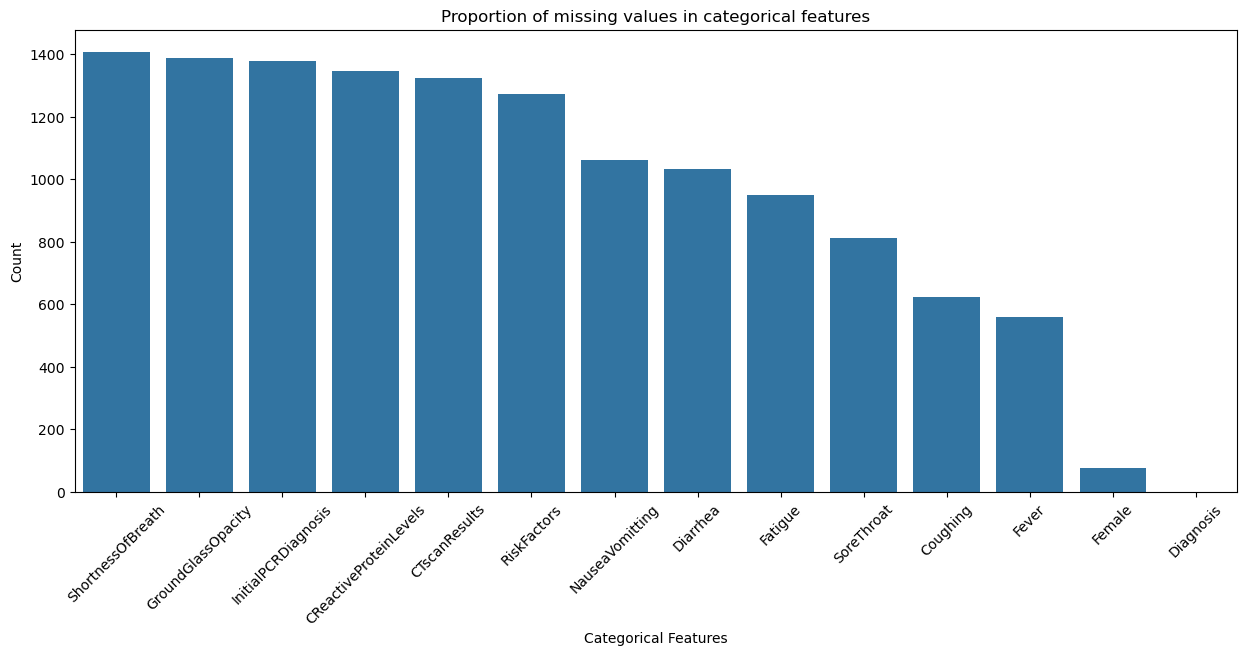

In [15]:
categorical_nas = df[categorical_columns].isna().sum()
categorical_nas = categorical_nas.sort_values(ascending=False)
plt.figure(figsize = (15,6))
sns.barplot(data = categorical_nas)
plt.xticks(rotation=45)
plt.xlabel("Categorical Features")
plt.ylabel("Count")
plt.title("Proportion of missing values in categorical features")
plt.show()

Replacing binary values (yes and no) in various features to True and False values

In [16]:
df = df.replace({
    'Yes':True,
    'No':False
})


#### Segregating binary features and imputing with constant value of False

In [17]:
# grabbing all the features whose unique set of values have boolean values in them.

binary_features = [feature for feature in categorical_columns 
                   if True in df[feature].unique()
                   and
                   False in df[feature].unique()
                   ]

In [18]:
fill_with_false = SimpleImputer(strategy='constant', fill_value = False)
fill_with_false.fit_transform(df[binary_features])

array([[False, True, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, True, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=object)

## Feature Construction or Feature engineering

#### Logarithm Transformation
---
- works with only positive data since log(0) and log(-ve) is undefined
- Can be applied when the data is extremely right-skewed
- converts the data into more normal distribution
- Normal distribution is an assumption in many statistical test and algorithms such as chi-square test and logistic regression
- Log transformation tends to leave fewer outliers which are a weakness of machine learning algorithms


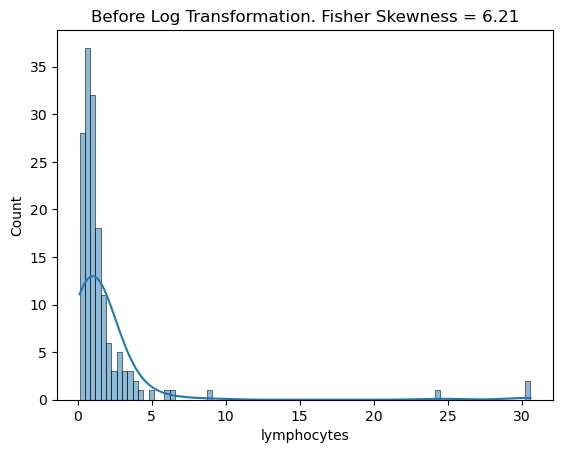

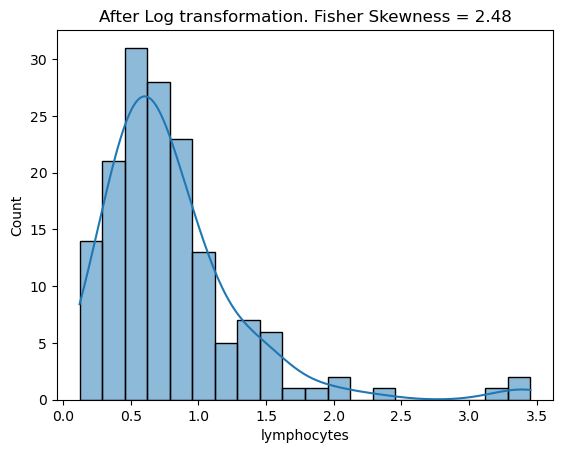

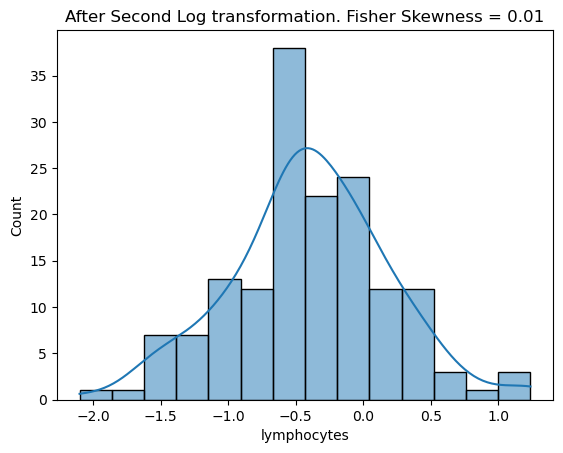

In [19]:
# plotting the Before and after log transformation distribution of lymphocytes
skew = np.round(df['lymphocytes'].skew(), 2)
sns.histplot(data = df['lymphocytes'], kde = True)
plt.title(f"Before Log Transformation. Fisher Skewness = {skew}")
plt.show()

data = np.log(df['lymphocytes'] + 1)
skew = np.round(data.skew(), 2)
sns.histplot(data = data, kde = True)
plt.title(f"After Log transformation. Fisher Skewness = {skew}")
plt.show()

data = np.log(data)
skew = np.round(data.skew(), 2)
sns.histplot(data = data, kde = True)
plt.title(f"After Second Log transformation. Fisher Skewness = {skew}")
plt.show()

**Observation:** The skewness of data in lymphocytes reduced by almost 1/3. Applying the log transformation to the dataset for 2 simultaneous times results in almost gaussian distribution with near 0 skewness.

### Box-Cox Transformation
---
- A transformation that is parameterised by lambda and that will make the distribution closer to gaussian distribution <br>
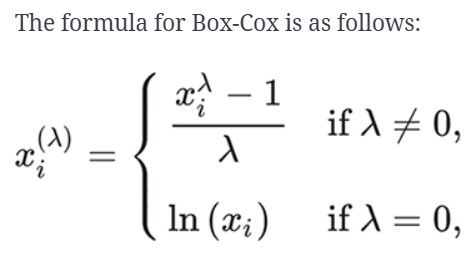 <br>
- The author talks about normalizing negative data using yeo-johnson transformation.

**Note:** Box-Cox works only with positive data. That's why we are scaling age variable by a factor of 0.01 to make it strictly positive data.<br>
**Note:** For transformation of feature with negative data, we can use yeo-johnson transformation

In [20]:
df['Age'] = df['Age'] + 0.01

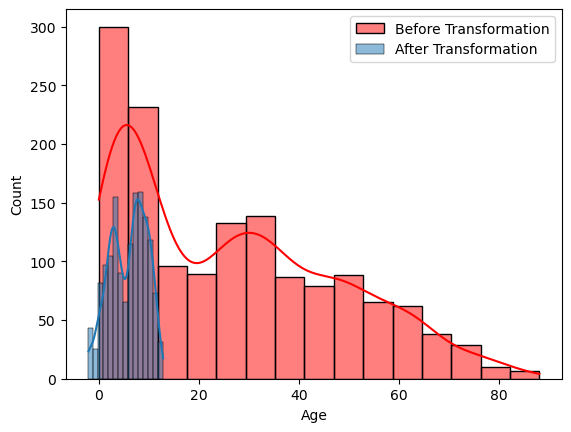

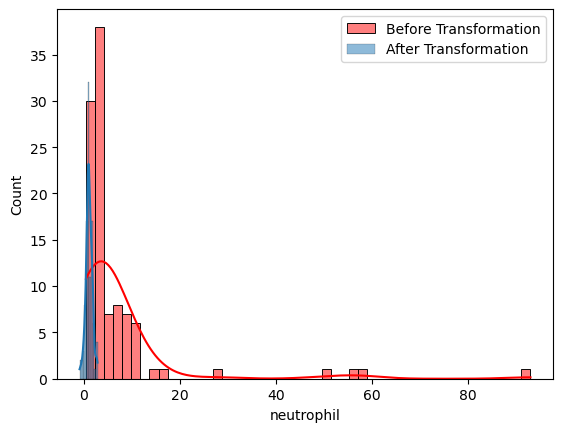

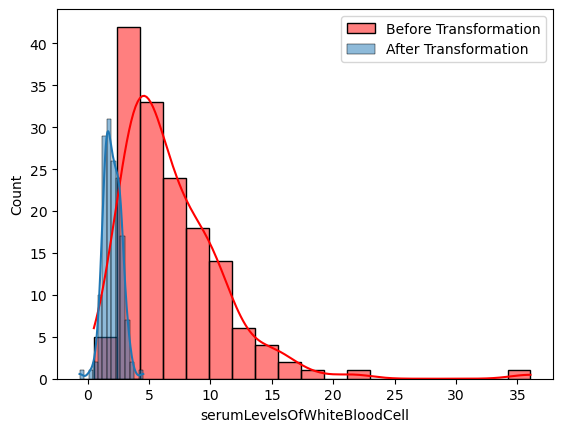

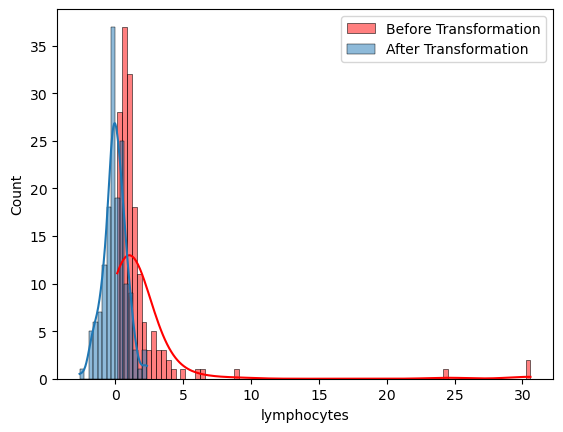

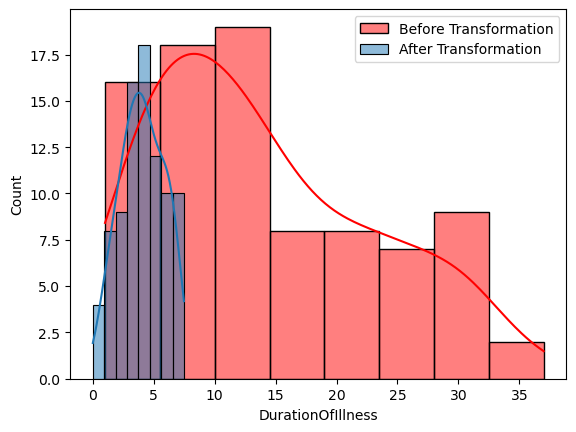

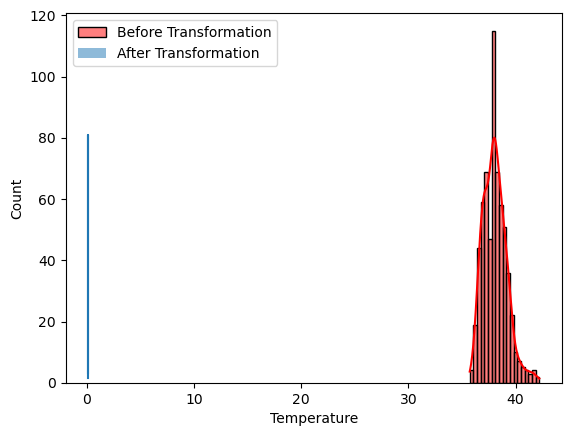

In [21]:
# applying box-cox transformation of numerical variables before and after transformation
from sklearn.preprocessing import PowerTransformer
box_cox_transformer = PowerTransformer(method = 'box-cox', standardize=False)
for feature in numerical_columns:
    sns.histplot(data = df[feature], kde = True, label = "Before Transformation", color = 'red')
    sns.histplot(data = box_cox_transformer.fit_transform(df[[feature]]), kde = True, label = "After Transformation", color = 'green')
    plt.legend()
    plt.show()
    

We can also get the values of lambda that changed the distribution of the dataset.

In [22]:
pd.DataFrame(
    box_cox_transformer.fit_transform(df[numerical_columns]), 
    columns=numerical_columns
)
box_cox_transformer.lambdas_

array([ 0.41035252, -0.22261794,  0.12473206, -0.24415702,  0.36376996,
       -7.01163036])

### **Disadvantages** of using box-cox and log transformation
- distorting the original distribution can decrease the performance
- We might be changing the covariance between two variables or multiple statistical measures, which may become an issue when applying techniques like PCA
- Transformations may hide the outliers in the distribution which might yield good results for performance metrics on training dataset but may yield bad results on test dataset
- The author suggests using box-cox transformation over log transformation for converting positive data to near normal distribution



## Feature Scaling
---
- In the presence of huge number of outliers, it is generally a good practice to go with z-score transformation, else we can go with min-max scaling also. This is because z-score transformation ensures that the outliers are handled properly as min-max has a hard time dealing with it.


In [23]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Firstly applying min-max scaling to the numerical features
# x(new) = (x - min)/(max - min)


print("After the application of min-max transformation for feature scaling")
print("--------------------------------------------------------------------------")
print(
    pd.DataFrame(
        MinMaxScaler().fit_transform(df[numerical_columns]),
        columns = numerical_columns
    ).describe()
)

print("\nAfter the application of Z-score transformation for feature scaling")
print("-------------------------------------------------------------------------")
print(
    pd.DataFrame(
        StandardScaler().fit_transform(df[numerical_columns]),
        columns = numerical_columns
    ).describe()
)

After the application of min-max transformation for feature scaling
--------------------------------------------------------------------------
               Age  neutrophil  serumLevelsOfWhiteBloodCell  lymphocytes  \
count  1454.000000  103.000000                   151.000000   156.000000   
mean      0.300807    0.069236                     0.179510     0.056454   
std       0.244182    0.137111                     0.122200     0.129855   
min       0.000000    0.000000                     0.000000     0.000000   
25%       0.079545    0.018519                     0.098257     0.016656   
50%       0.272727    0.030944                     0.145909     0.025451   
75%       0.477273    0.066977                     0.243323     0.048408   
max       1.000000    1.000000                     1.000000     1.000000   

       DurationOfIllness  Temperature  
count          87.000000   628.000000  
mean            0.360792     0.360937  
std             0.251199     0.168380  
min         

### Binning the data
---
- Binning refers to the creation of a new categorical feature from either a numerical or a categorical feature.
- Binning is used as one of the transformations for qualitative data because we want to reduce the model's chance of overfitting the data. However, we are losing granularity of the data.
- To bin data we will be using KBinsDiscretizer class from scikit-learn.   

#### Equi-width binning

<Axes: title={'center': 'Age(Uniform Binning)'}, xlabel='Age', ylabel='Frequency'>

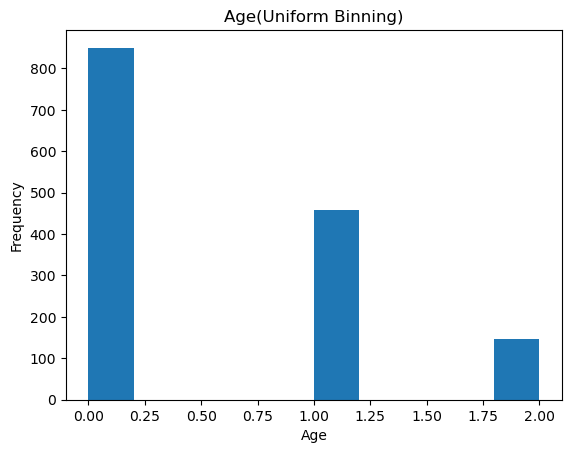

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
binner = KBinsDiscretizer(n_bins = 3, encode = 'ordinal', strategy = 'uniform')
binned_data = binner.fit_transform(df[['Age']].dropna())

# The shape of the binned_data is (1451,1) which means 1451 rows and 1 column
# To reshape the binned_data into a single list we can use .reshape(-1,) method
# What have I tried: 
# list(binned_data) -> list of individual array objects not numbers
# pd.DataFrame(binned_data) -> returns dataframe with a single column named as '0'
# pd.Series(binned_data) -> throws error due to shape issues.


binned_data_format = pd.Series(binned_data.reshape(-1,))
binned_data_format.plot(title='Age(Uniform Binning)', kind='hist', xlabel='Age')

#### Quantile Binning
- equi-depth binning

<Axes: title={'center': 'Age (quantile binning)'}, xlabel='Age', ylabel='Frequency'>

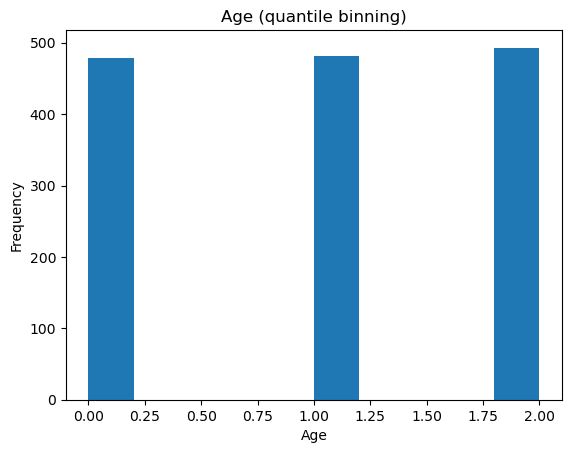

In [40]:
equi_depth_binner = KBinsDiscretizer(n_bins = 3, encode = 'ordinal', strategy = 'quantile')
equi_depth_binned_data = equi_depth_binner.fit_transform(df[['Age']].dropna())
pd.Series(equi_depth_binned_data.reshape(-1,)).plot(title='Age (quantile binning)', kind='hist', xlabel='Age')

c:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


<Axes: title={'center': 'Age (Kmeans binning)'}, xlabel='Age', ylabel='Frequency'>

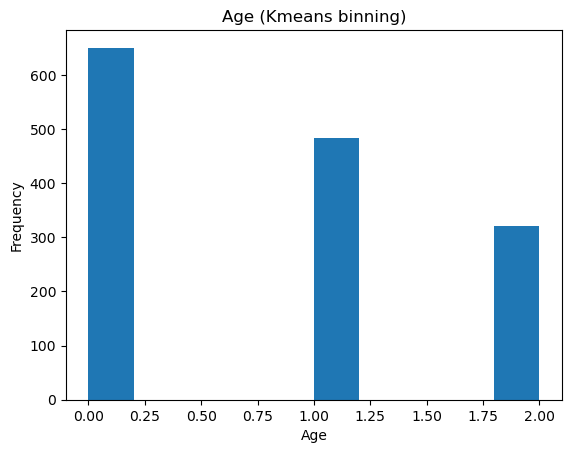

In [44]:
kmeans_binner = KBinsDiscretizer(n_bins = 3, encode = 'ordinal', strategy = 'kmeans')
kmeans_binned_data = kmeans_binner.fit_transform(df[['Age']].dropna())
pd.Series(kmeans_binned_data.reshape(-1,)).plot(title='Age (Kmeans binning)', kind='hist', xlabel='Age')

In [46]:
df['RiskFactors'].unique()

array([nan, 'immuno', 'Renal Disease, athero',
       'chronic, diabetes, athero', 'diabetes',
       'asthma, congestive, diabetes', 'diabetes, Renal Disease',
       'chronic', 'asthma', 'asthma, diabetes', 'athero',
       'asthma, chronic, diabetes', 'diabetes, athero', 'asthma, chronic',
       'asthma, immuno', 'congestive, diabetes, Renal Disease',
       'asthma, Renal Disease', 'Renal Disease',
       ' Chronic Liver Disorder, chronic', 'Heart Disease',
       'Chronic Endrocrine Disorder, chronic', 'immuno, chronic',
       'hematological disease, immuno, Renal Disease',
       'Chronic Neurological Disorders', 'chronic, diabetes',
       'chronic, immuno', 'diabetes, obesity',
       'asthma, respiratory disease',
       'asthma, respiratory disease, hematological disease',
       'respiratory disease', 'pneumonia', 'gastrectomy', 'lung cancer',
       'HepB', 'obesity', 'Fatty Liver', 'Hypertension',
       'diabetes, Hypertension',
       'Hypertension, Heart Disease, chro

### New Things Coming
---
Follow the below commands to update this file with remote repo<br>
git add path_file_name<br>
git commit -m "commit message"<br>
git push -u origin main<br>